## 予測の向き

- XからYを予測するモデル
- YからXを予測するモデル

は同じになるわけではない。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = sns.load_dataset('iris')

coefficient=2.230, intercept=1.084
x=2, y_predict=5.543439023094239


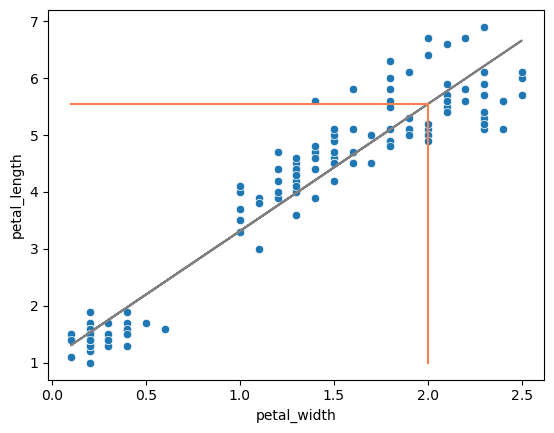

In [3]:
# 線形単回帰モデルの作成
# - petal_width から petal_length を予測
X_label = 'petal_width'
Y_label = 'petal_length'

X = df[[X_label]]
Y = df[Y_label]

# 線形回帰モデルの作成
model = LinearRegression()

# モデルの学習
model.fit(X, Y)

# coefficient: 係数, intercept: 切片
print('coefficient={:.3f}, intercept={:.3f}'.format(model.coef_[0], model.intercept_))

# 散布図
sns.scatterplot(x=X_label, y=Y_label, data=df)

# モデルによる予測
Y_predict = model.predict(X)

# 回帰直線を描画
plt.plot(X, Y_predict, color='gray')
#plt.plot(X[X_label].to_numpy(), Y_predict, color='gray')

# 予測
_x = 2
_y = model.predict(pd.DataFrame({X_label: [_x]}))[0]

_y1 = df[Y_label].min()
plt.plot([_x, _x], [_y, _y1], color='coral')

_x1 = df[X_label].min()
plt.plot([_x, _x1], [_y, _y], color='coral')

print('x={}, y_predict={}'.format(_x, _y))

coefficient=0.416, intercept=-0.363
x=5.543439023094239, y_predict=1.9416392777517215


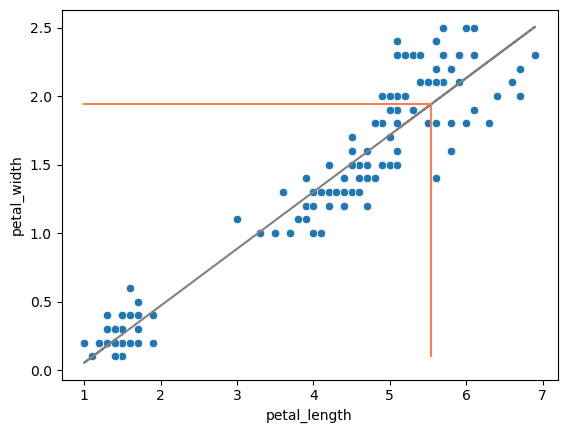

In [4]:
# 線形単回帰モデルの作成
# - petal_length から petal_width を予測
X_label = 'petal_length'
Y_label = 'petal_width'

X = df[[X_label]]
Y = df[Y_label]

# 線形回帰モデルの作成
model = LinearRegression()

# モデルの学習
model.fit(X, Y)

# coefficient: 係数, intercept: 切片
print('coefficient={:.3f}, intercept={:.3f}'.format(model.coef_[0], model.intercept_))

# 散布図
sns.scatterplot(x=X_label, y=Y_label, data=df)

# モデルによる予測
Y_predict = model.predict(X)

# 回帰直線を描画
plt.plot(X, Y_predict, color='gray')
#plt.plot(X[X_label].to_numpy(), Y_predict, color='gray')

# 予測
_x = 5.543439023094239
_y = model.predict(pd.DataFrame({X_label: [_x]}))[0]

_y1 = df[Y_label].min()
plt.plot([_x, _x], [_y, _y1], color='coral')

_x1 = df[X_label].min()
plt.plot([_x, _x1], [_y, _y], color='coral')

print('x={}, y_predict={}'.format(_x, _y))

## 処理の関数化

上記のように、同じ処理を複数のデータに対し繰り返し行う場合は、関数化する

- 1箇所だけを修正すれば良くなる
- 見た目もすっきりとする

In [5]:
def do_simple_regression(df, X_label, Y_label, _x):
    """
    - df の X_label から Y_label を予測
    - _x からの予測値を散布図に重ね、数値も表示
    """
    X = df[[X_label]]
    Y = df[Y_label]

    # 線形回帰モデルの作成
    model = LinearRegression()

    # モデルの学習
    model.fit(X, Y)

    # coefficient: 係数, intercept: 切片
    print('coefficient={:.3f}, intercept={:.3f}'.format(model.coef_[0], model.intercept_))

    # 散布図
    sns.scatterplot(x=X_label, y=Y_label, data=df)

    # モデルによる予測
    Y_predict = model.predict(X)

    # 回帰直線を描画
    plt.plot(X, Y_predict, color='gray')
    #plt.plot(X[X_label].to_numpy(), Y_predict, color='gray')

    # 予測
    _y = model.predict(pd.DataFrame({X_label: [_x]}))[0]
    
    _y1 = df[Y_label].min()
    plt.plot([_x, _x], [_y, _y1], color='coral')

    _x1 = df[X_label].min()
    plt.plot([_x, _x1], [_y, _y], color='coral')

    print('x={}, y_predict={}'.format(_x, _y))

coefficient=-0.062, intercept=3.419
x=6, y_predict=3.047638048318951


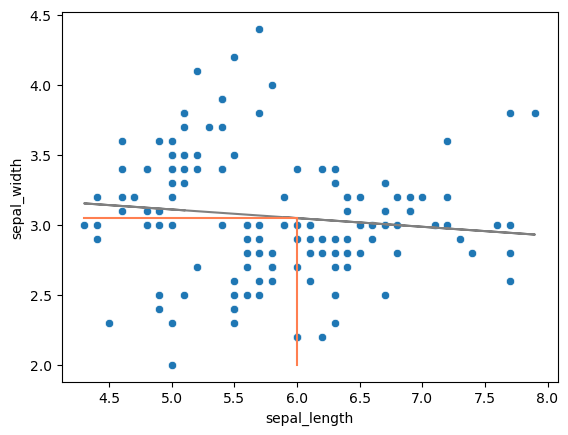

In [6]:
do_simple_regression(df, 'sepal_length', 'sepal_width', 6)

coefficient=-0.223, intercept=6.526
x=3.047638048318951, y_predict=5.845498882482103


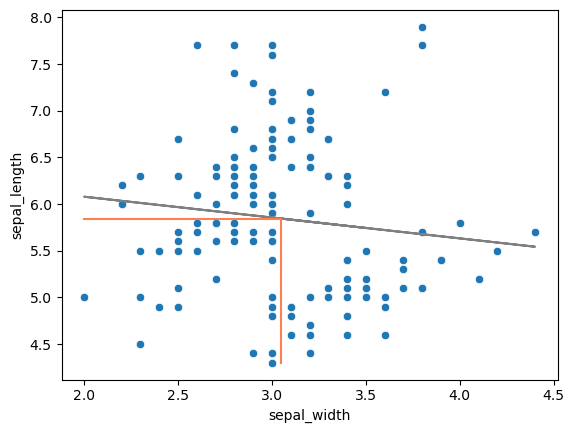

In [7]:
do_simple_regression(df, 'sepal_width', 'sepal_length', 3.047638048318951)